## Лабораторная №1: гистограммы


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

In [2]:
with open('data_sample.txt', mode='r', encoding='utf8') as f:
    sample_raw = [float(x) for x in f.read().split()]

In [3]:
sample = pd.Series(sorted(sample_raw))

In [4]:
x_min, x_max, = min(sample), max(sample)

In [5]:
h = 6.64
k = int((x_max - x_min)/h) # bins no

In [6]:
def find_index(a, v):
    l, r = 0, len(a) - 1
    while l < r:
        m = (l+r)//2
        if   v < a[m]: r = m-1
        elif v > a[m]: l = m+1
        else: return m
    return (l+r)//2
    
# ordered sample
x = sorted(set(sample))
fqn = [0 for x_j in x]
for x_j in sample:
    j = find_index(x, x_j)
    fqn[j] += 1
n = len(sample)
normed_fqn =\
    { x[j]: fqn[j]/n for j,x_j in enumerate(x) }

In [7]:
def show_histograms(sample, k):
    fig, (ax1, ax2, ax3, ax4) = \
        plt.subplots(nrows=4,
                     ncols=1,
                     figsize=(4,8))
    fig.tight_layout()
    n, bins, patches = ax1.hist(sample, k)
    mids = (np.array(bins[1:]) + bins[:-1])/2
    ax1.plot(mids,
             n,
             color='red',
             linewidth=2.718281828,
             label="simple plot")
    ax1.scatter(mids, n, color='black', linewidth=2.718281828)
    
    n, bins, patches = \
        ax2.hist(
            sample,
            k,
            normed=True,
            label="normed")
    
    n, bins, patches =\
        ax3.hist(sample,
                 k,
                 cumulative=True,
                 label="cumulative")
    
    
    n, bins, patches =\
        ax4.hist(sample,
             k,
             cumulative=True,
             normed=True,
             label="cumulative, normed")
    plt.show()

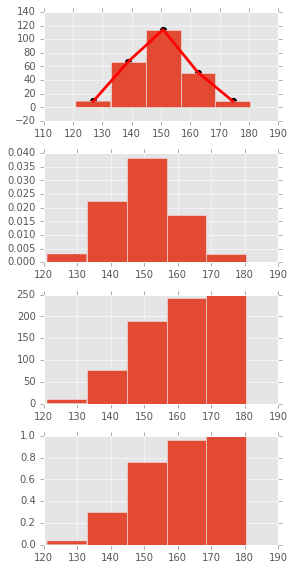

In [8]:
show_histograms(sample, k=5)

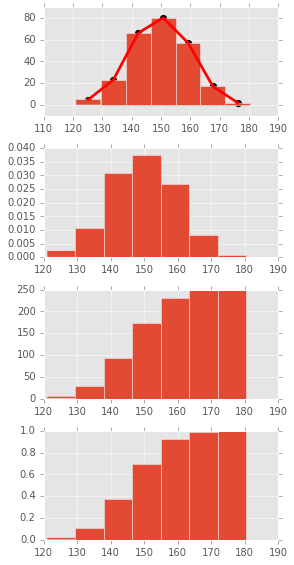

In [9]:
show_histograms(sample, k=7)

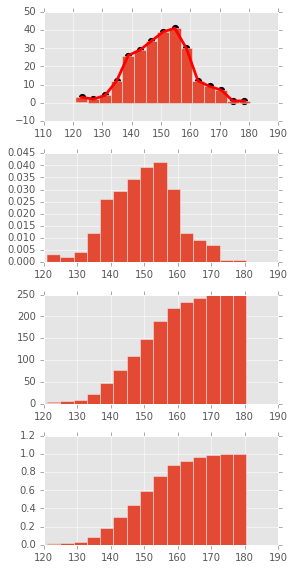

In [10]:
show_histograms(sample, k=15)

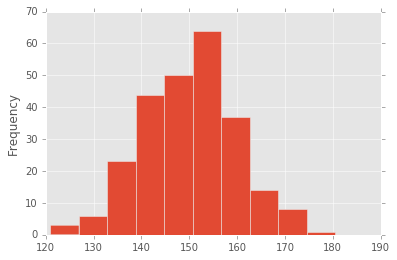

In [11]:
# much more convenient interface provided by Pandas
sample.plot.hist(bins=10)

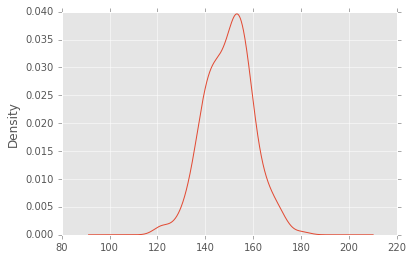

In [12]:
sample.plot.density()